
# <span style="color:#2c061f"> PS2: RNG, interactive plots and Walras equilibrium </span>  

<br>

## <span style="color:#374045"> Introduction to Programming and Numerical Analysis </span>
*Oluf Kelkjær*

### **Today's Plan**  
1. Kernel  
2. Random number generating
3. Interactive plots
4. Walras equilibrium

## Kernel  
In order to run a notebook Jupyter relies on a *kernel*. 
A Kernel is essentially a *Python interpreter* in which variables and functions are stored.  

It's a good idea to restart the kernel every now and then in order to clear the memory. **Why?**

In [8]:
# define a global variable 
a=2
# simple function
def f(Z):
    Y=Z*2
    return Y
print(f(Z))



20


## kernel continued  
You may have written an infinite `while`-loop with no `break` statement. In this case you need to interrupt the kernel. Unfortunately, no shortcut exists. Therefore, navigate to either *interrupt* or *restart kernel*. 

## Random number generating  
You will work with 2 packages for RNG
* `numpy` useful when drawing **heterogeneous preferences** following some distribution.  
   E.g `alphas = np.random.normal(loc=mu,scale=sigma,size=N)`  
   
   
* `scipy.stats` built on numpy. Neat when you want a random number generator object  
   E.g `F = norm(loc=mu,scale=sigma)` where the density at `x` is:`F.pdf(x)`.

**Note**: remember to set a **seed** for replicability, `np.random.seed(1986)`.  

## Interactive figures  
Many include these in their data-project!  

Can create **sliders**, **textbox**, **checkbox** and **dropdown menu**  

Requirements:
1. Define figure as a **function** of inputs
2. Interactive figures are based on that function where you (interactable) **let inputs vary**  
   The rest of the inputs (non-interactable) you need to define as **fixed**


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import expon
import numpy as np

# 1 defining figure as function of inputs # This is how plot should look given the inputs
def fitting_exponential(X_draws,beta_guess,legend=False):
    
    # i. exponential distribution based on beta guess
    F = expon(scale = beta_guess) 
    
    # ii. x-values
    x_low = F.ppf(0.001) # returns the x of 0.1 percentile (x value where cdf is 0.001: ppf = inverse(cdf))
    x_high = F.ppf(0.999) # returns the x of 99.9 percentile
    x = np.linspace(x_low,x_high,100)

    # iii. figure
    fig = plt.figure(dpi=100) # dots-per-inch (think pixels)
    ax = fig.add_subplot(1,1,1)
    # plot based on beta_guess
    ax.plot(x,F.pdf(x),lw=2, label = 'density of guess') # probability density function - call F to evaluate density at X
    # histogram of actual drawn data
    ax.hist(X_draws,bins=100,density=True,histtype='stepfilled', label = 'actual data')
    ax.set_ylim([0,0.5])
    ax.set_xlim([0.01,10])
    if legend == True:
        ax.legend()
        
        

In [11]:
beta_true = 2
# draw from exponential distribution based on true beta
X = np.random.exponential(beta_true,size=10**6)

import ipywidgets as widgets
# create interactive figure based on plot-function
widgets.interact(fitting_exponential,
    X_draws=widgets.fixed(X),
    beta_guess=widgets.FloatSlider(description="guess of beta", min=0.1, max=6, step=0.05, value=3),
    legend = widgets.Checkbox(False, description = 'legend')
);



interactive(children=(FloatSlider(value=3.0, description='guess of beta', max=6.0, min=0.1, step=0.05), Checkb…

In [ ]:
from scipy.stats import norm
F = norm(loc=0,scale=2)

print(f'Density at x=0: {F.pdf(0):.3f}')
print(f'x-value where cummulative distribution is 0.5 = {F.ppf(0.5):.3f}')

## Walras equilibrium  
In *lecture 4* agents exhibitted **heterogeneous preferences** but *homogeneous endownment*.  
Today you face an exchange economy where (N) agents exhibit **heterogeneous preferences** and **heterogeneous endownments**.
* *preferences* follow some transformation of a **normal distribution** `np.random.normal(loc,scale,size=N)`
* *endownments* follow an **exponential distribution** `np.random.exponential(beta,size=N)`

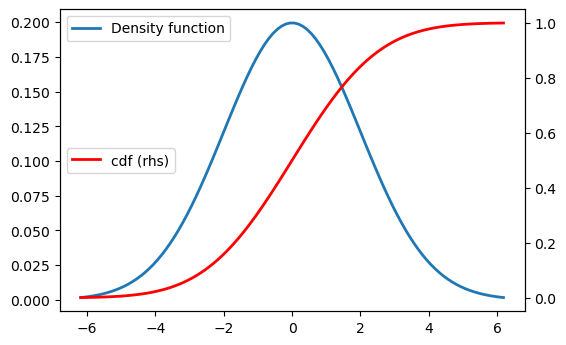

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

F = norm(loc=0,scale=2)
x_low = F.ppf(0.001) # returns the x of 0.1 quantile (x value where cdf is 0.001)
x_high = F.ppf(0.999) # returns the x of 99.9 quantile
x = np.linspace(x_low,x_high,100)

fig = plt.figure(dpi=100) # dots-per-inch (think pixels)
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()
ax1.plot(x,F.pdf(x),lw=2, label = 'Density function') # probability density function - call F to evaluate density at X
ax2.plot(x,F.cdf(x),lw=2, label = 'cdf (rhs)', color = 'red')
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'center left');
plt.savefig('density_cdf.png')